<a href="https://colab.research.google.com/github/niss10/IS-698-FL-Project/blob/main/FedCollab_Centralize_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implemented Centralize Machine Learning on SVD

# Prerequisite
Run below cell then restart session and don't run this cell again

In [ ]:
# Force‑reinstall NumPy and scikit‑learn
!pip install --upgrade --force-reinstall numpy==1.24.4
!pip install scikit-surprise

# restart session and don't run this cell again

  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, bu

# Phase 1: Data undestanding and Data Pre-processing
We will do Exploratory Data Analysis and and necessory pre-processing before Model Training

### Load and Preview the Dataset

*  First Importing necessary libraries
*  Loading and previewing all three datasets

In [ ]:
# Importing Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
from google.colab import files


In below cell we will load three original files movies.dat, user.dat, ratings.dat

In [ ]:
# Loading the datset
# upload ratings.dat, users.dat, movies.dat dataset file
print("Please upload movies.dat file, File name must be movies.dat")
movies = files.upload()
if(movies):
  print("movies.dat file uploaded successfully")
else:
  print("Please upload movies.dat file")
  movies = files.upload()

print("Please upload users.dat file, File name must be users.dat")
users = files.upload()
if(movies):
  print("users.dat file uploaded successfully")
else:
  print("Please upload users.dat file")
  users = files.upload()

print("Please upload ratings.dat file, Files name must be ratings.dat")
ratings = files.upload()
if(ratings):
  print("ratings.dat file uploaded successfully")
else:
  print("Please upload ratings.dat file")
  users = files.upload()


Please upload movies.dat file, File name must be movies.dat


Saving movies.dat to movies.dat
movies.dat file uploaded successfully
Please upload users.dat file, File name must be users.dat


Saving users.dat to users.dat
users.dat file uploaded successfully
Please upload ratings.dat file, Files name must be ratings.dat


Saving ratings.dat to ratings.dat
ratings.dat file uploaded successfully


In [ ]:
# Loading dataset in Pandas and Preview the MovieLens 1M Dataset

# Define File Paths (Assuming files are uploaded to Colab)
ratings_path = "ratings.dat"
users_path = "users.dat"
movies_path = "movies.dat"

# Load Ratings Dataset
ratings_df = pd.read_csv(
    ratings_path,
    sep="::",
    engine="python",
    names=["UserID", "MovieID", "Rating", "Timestamp"]
)

# Load Users Dataset
users_df = pd.read_csv(
    users_path,
    sep="::",
    engine="python",
    names=["UserID", "Gender", "Age", "Occupation", "Zip-code"]
)

# Load Movies Dataset
movies_df = pd.read_csv(
    movies_path,
    sep="::",
    engine="python",
    names=["MovieID", "Title", "Genres"],
    encoding="latin-1"  # To handle special characters
)

# Preview Loaded Data
print("Ratings Dataset:")
display(ratings_df.head())

print("Users Dataset:")
display(users_df.head())

print("Movies Dataset:")
display(movies_df.head())


Ratings Dataset:


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


Users Dataset:


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


Movies Dataset:


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


### Dataset Overview

*   Checking the shape of each dataset
*   Checking for missing/null values
*   Understand basic statistics (number of unique users, movies, ratings)

In [ ]:
# Dataset Overview & Sanity Checks

# Dataset Dimensions
print("Shape of Ratings Dataset:", ratings_df.shape)
print("Shape of Users Dataset:", users_df.shape)
print("Shape of Movies Dataset:", movies_df.shape)

# Null/Missing Value Check
print("\nMissing values in Ratings:")
print(ratings_df.isnull().sum())

print("\nMissing values in Users:")
print(users_df.isnull().sum())

print("\nMissing values in Movies:")
print(movies_df.isnull().sum())

# Basic Dataset Stats
print("\nNumber of unique users:", ratings_df['UserID'].nunique())
print("Number of unique movies rated:", ratings_df['MovieID'].nunique())
print("Total number of ratings:", len(ratings_df))

# Check for duplicate rows
print("\nDuplicate rows in ratings:", ratings_df.duplicated().sum())
print("Duplicate rows in users:", users_df.duplicated().sum())
print("Duplicate rows in movies:", movies_df.duplicated().sum())

Shape of Ratings Dataset: (1000209, 4)
Shape of Users Dataset: (6040, 5)
Shape of Movies Dataset: (3883, 3)

Missing values in Ratings:
UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

Missing values in Users:
UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

Missing values in Movies:
MovieID    0
Title      0
Genres     0
dtype: int64

Number of unique users: 6040
Number of unique movies rated: 3706
Total number of ratings: 1000209

Duplicate rows in ratings: 0
Duplicate rows in users: 0
Duplicate rows in movies: 0


### Descriptive Analysis & Distributions.

*   What are the rating patterns?
*   What movies are most rated?
*   How are movies genres distributed?



#### Rating Distribution

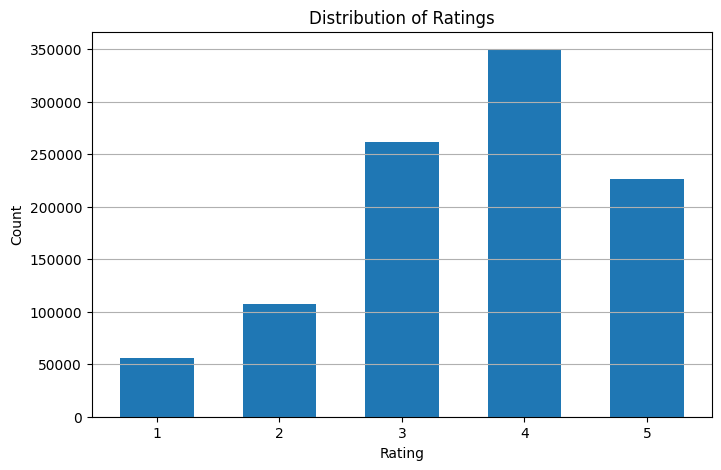

Rating
1     56174
2    107557
3    261197
4    348971
5    226310
Name: count, dtype: int64


In [ ]:
# Rating Distribution

# Distribution of Ratings
rating_counts = ratings_df['Rating'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(rating_counts.index, rating_counts.values, width=0.6)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.grid(axis='y')
plt.show()

print(rating_counts)


#### Ratings per User

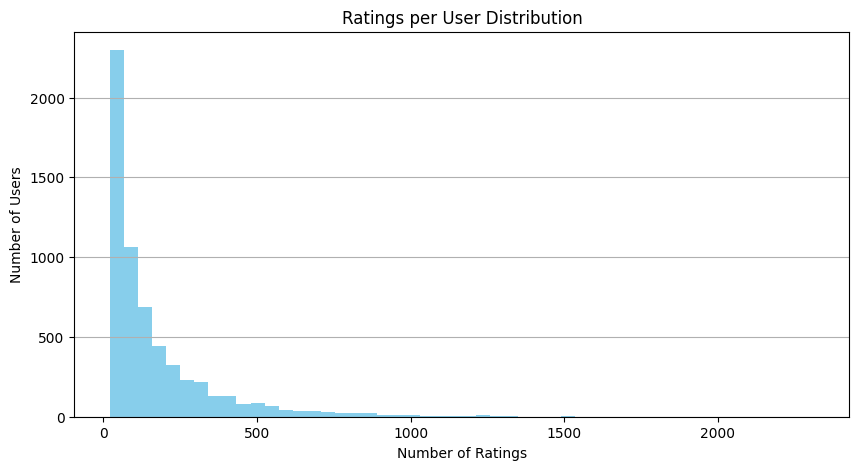

Avg ratings per user: 165.5975165562914
Min ratings per user: 20
Max ratings per user: 2314


In [ ]:
# Ratings per User

ratings_per_user = ratings_df.groupby('UserID').size()

plt.figure(figsize=(10, 5))
plt.hist(ratings_per_user, bins=50, color='skyblue')
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Users")
plt.title("Ratings per User Distribution")
plt.grid(axis='y')
plt.show()

print("Avg ratings per user:", ratings_per_user.mean())
print("Min ratings per user:", ratings_per_user.min())
print("Max ratings per user:", ratings_per_user.max())

#### Ratings per Movie

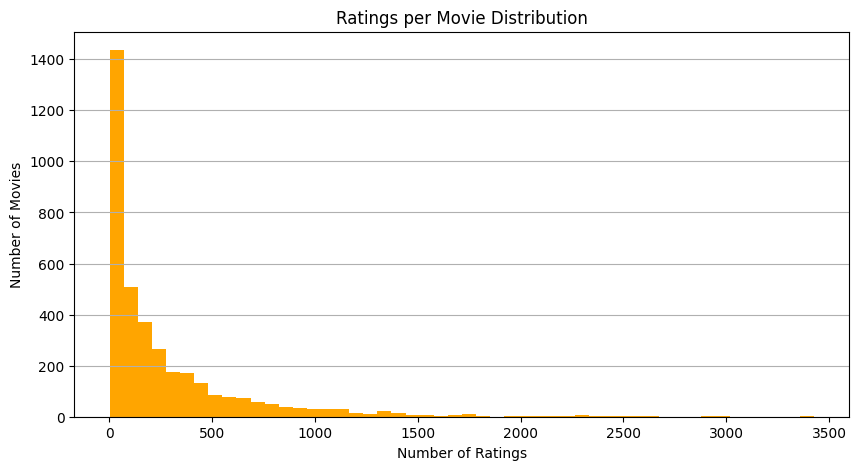

Avg ratings per movie: 269.88909875876953
Movies rated only once: 114


In [ ]:
# Ratings per Movie

ratings_per_movie = ratings_df.groupby('MovieID').size()

plt.figure(figsize=(10, 5))
plt.hist(ratings_per_movie, bins=50, color='orange')
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Movies")
plt.title("Ratings per Movie Distribution")
plt.grid(axis='y')
plt.show()

print("Avg ratings per movie:", ratings_per_movie.mean())
print("Movies rated only once:", (ratings_per_movie == 1).sum())


#### Genre Distribution

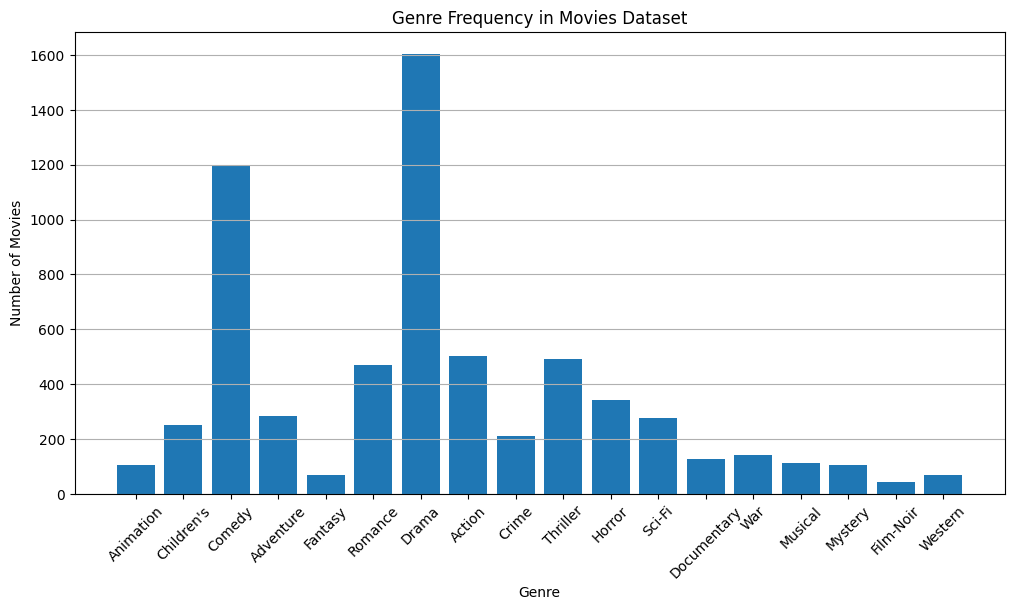

Top genres: [('Drama', 1603), ('Comedy', 1200), ('Action', 503), ('Thriller', 492), ('Romance', 471)]


In [ ]:
# Genre Distribution

# Split and count genres
genre_counter = Counter()
for genre_str in movies_df['Genres']:
    genres = genre_str.split('|')
    genre_counter.update(genres)

# Plot genre frequency
plt.figure(figsize=(12, 6))
plt.bar(genre_counter.keys(), genre_counter.values())
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.title("Genre Frequency in Movies Dataset")
plt.grid(axis='y')
plt.show()

# Print top genres
print("Top genres:", genre_counter.most_common(5))


#### User Demographics Overview

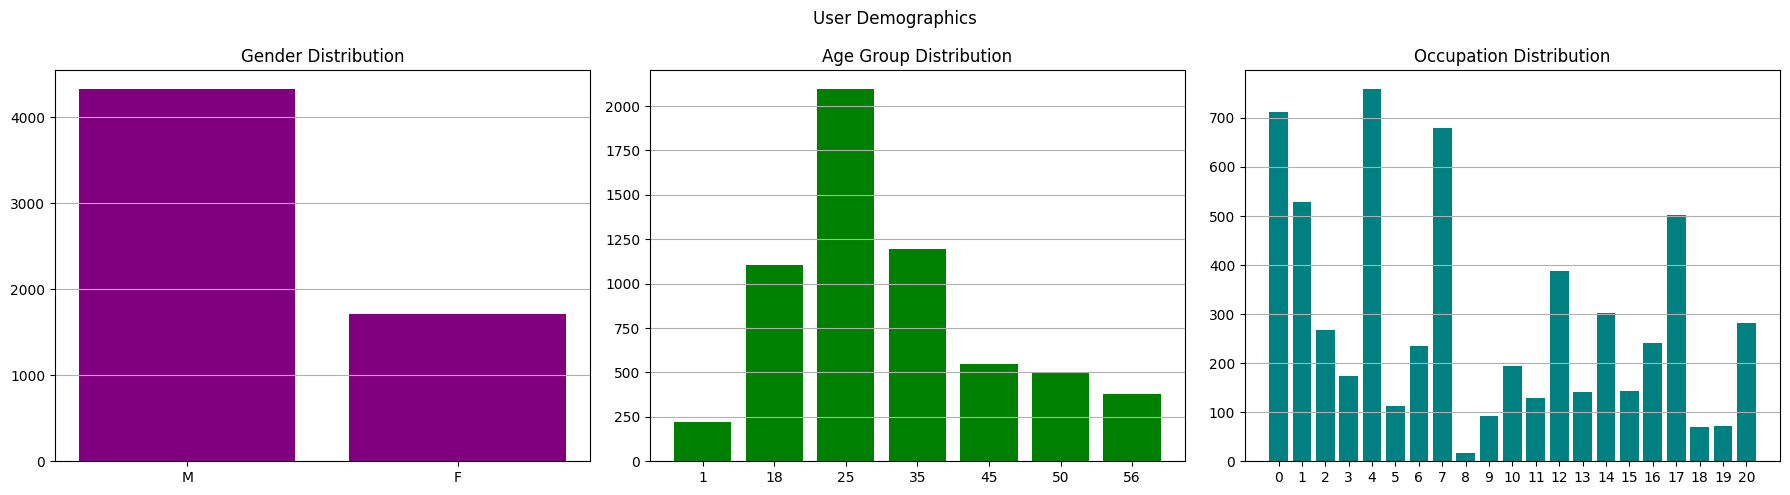

In [ ]:
# Step 3e: User Demographics

# Gender distribution
gender_dist = users_df['Gender'].value_counts()

# Age distribution
age_dist = users_df['Age'].value_counts().sort_index()

# Occupation distribution
occupation_dist = users_df['Occupation'].value_counts().sort_index()

# Plot all three side-by-side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gender
axes[0].bar(gender_dist.index, gender_dist.values, color='purple')
axes[0].set_title("Gender Distribution")

# Age
axes[1].bar(age_dist.index.astype(str), age_dist.values, color='green')
axes[1].set_title("Age Group Distribution")

# Occupation
axes[2].bar(occupation_dist.index.astype(str), occupation_dist.values, color='teal')
axes[2].set_title("Occupation Distribution")

for ax in axes:
    ax.grid(axis='y')

plt.suptitle("User Demographics")
plt.tight_layout()
plt.show()

### Preprocessing for Centralized Machine Learning.
We have did below pre-processing steps
1.   Merge ratings, users, and movies
2.   Extract year from movie title
3.   Convert genres using multi-hot
4.   Encode categorical columns
5.   Saved final dataframe in CSV file which we will use in centralize training and then also use for Federated Learning

#### Merge All Datasets

In [ ]:
#  Merge Ratings + Users + Movies

# Merge ratings + users
ratings_users = pd.merge(ratings_df, users_df, on="UserID", how="left")

# Merge result with movies
full_df = pd.merge(ratings_users, movies_df, on="MovieID", how="left")

# Preview merged dataset
print("Merged dataset shape:", full_df.shape)
display(full_df.head())

Merged dataset shape: (1000209, 10)


,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy


#### Extract Year from Title

In [ ]:
# Extract Year from Movie Title

def extract_year(title):
    match = re.search(r"\((\d{4})\)", title)
    return int(match.group(1)) if match else None

full_df["Year"] = full_df["Title"].apply(extract_year)
display(full_df[["Title", "Year"]].drop_duplicates().head())


,Title,Year
0,One Flew Over the Cuckoo's Nest (1975),1975
1,James and the Giant Peach (1996),1996
2,My Fair Lady (1964),1964
3,Erin Brockovich (2000),2000
4,"Bug's Life, A (1998)",1998


#### Genre Multi-hot Encoding Processing

In [ ]:
# Multi-hot Encoding for Genres

# Get unique genre list
all_genres = set(g for sublist in full_df['Genres'].str.split('|') for g in sublist)

# Multi-hot encode
for genre in all_genres:
    full_df[f"Genre_{genre}"] = full_df['Genres'].apply(lambda x: int(genre in x.split('|')))

# Preview multi-hot genre columns
genre_columns = [col for col in full_df.columns if col.startswith("Genre_")]
display(full_df[['Title'] + genre_columns].head())


,Title,Genre_Comedy,Genre_Animation,Genre_Western,Genre_Sci-Fi,Genre_Children's,Genre_Horror,Genre_Film-Noir,Genre_Adventure,Genre_Drama,Genre_War,Genre_Thriller,Genre_Crime,Genre_Documentary,Genre_Romance,Genre_Musical,Genre_Fantasy,Genre_Action,Genre_Mystery
0,One Flew Over the Cuckoo's Nest (1975),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,James and the Giant Peach (1996),0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,My Fair Lady (1964),0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,Erin Brockovich (2000),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,"Bug's Life, A (1998)",1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Final Preprocessed Dataset

Save this file somewhare for future references

In [ ]:
# Final Sanity Check

print("Final dataset shape:", full_df.shape)
print("Columns in final dataset:")
print(full_df.columns.tolist())

preprocessed_dataset_file = "preprocessed_dataset.csv"
# Save for later phase and task
full_df.to_csv("preprocessed_dataset.csv", index=False)


# download the file
files.download(preprocessed_dataset_file)
print(f"preprcessed file saved to {preprocessed_dataset_file}")

Final dataset shape: (1000209, 29)
Columns in final dataset:
['UserID', 'MovieID', 'Rating', 'Timestamp', 'Gender', 'Age', 'Occupation', 'Zip-code', 'Title', 'Genres', 'Year', 'Genre_Comedy', 'Genre_Animation', 'Genre_Western', 'Genre_Sci-Fi', "Genre_Children's", 'Genre_Horror', 'Genre_Film-Noir', 'Genre_Adventure', 'Genre_Drama', 'Genre_War', 'Genre_Thriller', 'Genre_Crime', 'Genre_Documentary', 'Genre_Romance', 'Genre_Musical', 'Genre_Fantasy', 'Genre_Action', 'Genre_Mystery']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

preprcessed file saved to preprocessed_dataset.csv


# Phase 2: Centralized Machine Learning.

In this phase we will build Centralize Machine Learning and check how SVD models perfoms. We will do below tasks

*   We will train SVD Model using surprise librery
*   Evaluate how model perform using RME, RMSE, MAE and Precesion@k and Recall@k
*   Benchmark performance before federated learning

We aregoing with Collaborative Filtering using Surprise library it is simple and widely used for recommendation and it can set good benchmark for Federated Learning.

### Install Surprise & Import Packages

In [ ]:
# import required Libreries

from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse, mae, mse

### Prepare Data for Surprise

In [ ]:
# Load Data into Surprise Format

# Surprise needs only UserID, MovieID, Rating so we used that only
reader = Reader(rating_scale=(1, 5))

# Used our full_df
data = Dataset.load_from_df(full_df[["UserID", "MovieID", "Rating"]], reader)

# Split into train/test
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)


### Train SVD

In [ ]:
# Train SVD Model

model = SVD()
model.fit(trainset)

# Predict on test set
predictions = model.test(testset)

# Evaluate with RMSE
print("RMSE, MSE and MAE on test set:")
rmse(predictions)
mse(predictions)
mae(predictions)

RMSE, MSE and MAE on test set:
RMSE: 0.8743
MSE: 0.7645
MAE:  0.6859


0.6858649773968845

### Top-N Recommendation for a User
 just for testing how it works

In [ ]:
# Generate Top-N Recommendations for a User

#checking how predictions looks like
print(predictions[0])


from collections import defaultdict

def get_top_n(predictions, n=10):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

top_n = get_top_n(predictions, n=5)

# Show top 5 movie IDs recommended to user 1
print("Top 5 recommendations for user 1:")
print(top_n[1])


user: 1841       item: 3717       r_ui = 1.00   est = 2.13   {'was_impossible': False}
Top 5 recommendations for user 1:
[(720, 4.665581486430247), (1197, 4.363371015177129), (1962, 4.36192686470004), (2918, 4.293582057227691), (594, 4.253944594305618)]


### Precision@k and Recall@k


* Precision@k: Of the top-k recommendations, how many were actually liked?

* Recall@k: Of the movies a user actually liked, how many were in top-k?

In recommendation systems, we typically compute Precision@k and Recall@k by defining a "relevant" rating  usually >= 4.0.

We'll compute these for the top-10 recommendations per user.

In [ ]:
from collections import defaultdict

def precision_recall_at_k(predictions, k=10, threshold=4.0):
    # Map predictions to each user
    user_est_true = defaultdict(list)
    for pred in predictions:
        user_est_true[pred.uid].append((pred.iid, pred.est, pred.r_ui))

    precisions = {}
    recalls = {}

    for uid, user_ratings in user_est_true.items():
        # Sort predictions by estimated rating
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_k = user_ratings[:k]

        # Count relevant items (actual rating >= threshold)
        n_rel = sum((true_r >= threshold) for (_, _, true_r) in user_ratings)

        # Count recommended items that are relevant
        n_rec_k = sum((est >= threshold) for (_, est, _) in top_k)
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold)) for (_, est, true_r) in top_k)

        # Precision@k: relevant and recommended / recommended
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k else 0

        # Recall@k: relevant and recommended / relevant
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel else 0

    # Return average over all users
    avg_precision = sum(prec for prec in precisions.values()) / len(precisions)
    avg_recall = sum(rec for rec in recalls.values()) / len(recalls)

    return avg_precision, avg_recall

# Run evaluation
k=10 # how many recommendation you want to make
threshold=4.0
precision, recall = precision_recall_at_k(predictions, k=k, threshold=threshold)
print(f"Precision@10: {precision:.4f}")
print(f"Recall@10: {recall:.4f}")


Precision@10: 0.7571
Recall@10: 0.3540


## Centralize Learning Summary

### Centralized Model Performance

Model Type: Matrix Factorization (SVD) from surprise
Data Used: MovieLens 1M (UserID, MovieID, Rating)

#### Evaluation Metrics
- RMSE: ~0.86
- MSE: ~0.76
- MAE: ~0.68

#### Recommendation Evaluation with Precision & Recall

- We considered a movie relevant if user rating >= 4.0
- We generated top-10 movie predictions per user

- Precision@10: ~0.76 means Around 76% of top-10 recommendations are truly liked
- Recall@10: ~0.35 means Model captures 35% of movies the user actually likes

This results tells that model is precise but recall may be improved.



Now we have perfact benchmark set. We can move to Federated Learning see how it performs compare to Centralize learning

**For FL Check out flie: [FedCollab_FL.ipynb](https://colab.research.google.com/drive/1B5qBR-JK8RyY4KnzXuGSpEE6EJQhcMD1#scrollTo=hYf0xnm5O10y&line=23&uniqifier=1)**
